## Import important libraries 

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.linear_model import LinearRegression , Ridge , Lasso 
from sklearn.metrics import mean_squared_error ,mean_absolute_error ,r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from sklearn.model_selection import train_test_split , cross_val_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV , train_test_split 

In [2]:
pwd

'/Users/makhtar/Documents/learnpython/project_1_datacleaning_&_EDA_resources'

### Download Excel file

In [3]:
df = pd.read_excel('data/premiums_rest.xlsx')

In [4]:
df.shape

(29904, 13)

In [5]:
df.head()

,Age,Gender,Region,Marital_status,Number Of Dependants,BMI_Category,Smoking_Status,Employment_Status,Income_Level,Income_Lakhs,Medical History,Insurance_Plan,Annual_Premium_Amount
0,26,Male,Northwest,Unmarried,0,Normal,No Smoking,Salaried,<10L,6,Diabetes,Bronze,9053
1,29,Female,Southeast,Married,2,Obesity,Regular,Salaried,<10L,6,Diabetes,Bronze,16339
2,49,Female,Northeast,Married,2,Normal,No Smoking,Self-Employed,10L - 25L,20,High blood pressure,Silver,18164
3,30,Female,Southeast,Married,3,Normal,No Smoking,Salaried,> 40L,77,No Disease,Gold,20303
4,56,Male,Northeast,Married,3,Obesity,Occasional,Self-Employed,10L - 25L,14,Diabetes,Bronze,15610


In [6]:
df.columns

Index(['Age', 'Gender', 'Region', 'Marital_status', 'Number Of Dependants',
       'BMI_Category', 'Smoking_Status', 'Employment_Status', 'Income_Level',
       'Income_Lakhs', 'Medical History', 'Insurance_Plan',
       'Annual_Premium_Amount'],
      dtype='object')

In [7]:
df.columns = df.columns.str.replace(' ', '_').str.lower()

In [8]:
df.columns

Index(['age', 'gender', 'region', 'marital_status', 'number_of_dependants',
       'bmi_category', 'smoking_status', 'employment_status', 'income_level',
       'income_lakhs', 'medical_history', 'insurance_plan',
       'annual_premium_amount'],
      dtype='object')

In [9]:
df.head(4)

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount
0,26,Male,Northwest,Unmarried,0,Normal,No Smoking,Salaried,<10L,6,Diabetes,Bronze,9053
1,29,Female,Southeast,Married,2,Obesity,Regular,Salaried,<10L,6,Diabetes,Bronze,16339
2,49,Female,Northeast,Married,2,Normal,No Smoking,Self-Employed,10L - 25L,20,High blood pressure,Silver,18164
3,30,Female,Southeast,Married,3,Normal,No Smoking,Salaried,> 40L,77,No Disease,Gold,20303


### Handle Null Values 

In [10]:
df.isnull().sum()

age                      0
gender                   0
region                   0
marital_status           0
number_of_dependants     0
bmi_category             0
smoking_status           9
employment_status        1
income_level             9
income_lakhs             0
medical_history          0
insurance_plan           0
annual_premium_amount    0
dtype: int64

In [11]:
df.dropna(inplace = True)
df.isnull().sum()

age                      0
gender                   0
region                   0
marital_status           0
number_of_dependants     0
bmi_category             0
smoking_status           0
employment_status        0
income_level             0
income_lakhs             0
medical_history          0
insurance_plan           0
annual_premium_amount    0
dtype: int64

### Handle Duplicated Value

In [12]:
df.duplicated().sum()
df.drop_duplicates(inplace = True)
df.duplicated().sum()

0

## Explorartory Data Analysis - EDA

Exploratory Data Analysis (EDA) is an open-ended process where we calculate statistics and make figures to find trends, anomalies, patterns, or relationships within the data. The goal of EDA is to learn what our data can tell us. It generally starts out with a high level overview, then narrows in to specific areas as we find intriguing areas of the data. The findings may be interesting in their own right, or they can be used to inform our modeling choices, such as by helping us decide which features to use.



In [13]:
df.describe()

,age,number_of_dependants,income_lakhs,annual_premium_amount
count,29886.000000,29886.000000,29886.000000,29886.000000
mean,43.396105,2.379910,23.364184,20892.303821
std,13.412657,1.431201,24.740339,6936.813440
min,26.000000,-3.000000,1.000000,3625.000000
25%,34.000000,1.000000,7.000000,15697.250000
50%,42.000000,3.000000,17.000000,20489.000000
75%,52.000000,3.000000,32.000000,26360.000000
max,356.000000,5.000000,930.000000,43471.000000


Let's look at the number of columns of each data type. int64 and float64 are numeric variables (which can be either discrete or continuous). object columns contain strings and are categorical features. .

In [14]:
df.dtypes

age                       int64
gender                   object
region                   object
marital_status           object
number_of_dependants      int64
bmi_category             object
smoking_status           object
employment_status        object
income_level             object
income_lakhs              int64
medical_history          object
insurance_plan           object
annual_premium_amount     int64
dtype: object

In [15]:
df.select_dtypes(['int64']).head(2)

,age,number_of_dependants,income_lakhs,annual_premium_amount
0,26,0,6,9053
1,29,2,6,16339


#### Visualize the outliers using box-plot in above EDA

In [17]:
numeric_columns = df.select_dtypes(['int64']).columns 
numeric_columns

Index(['age', 'number_of_dependants', 'income_lakhs', 'annual_premium_amount'], dtype='object')

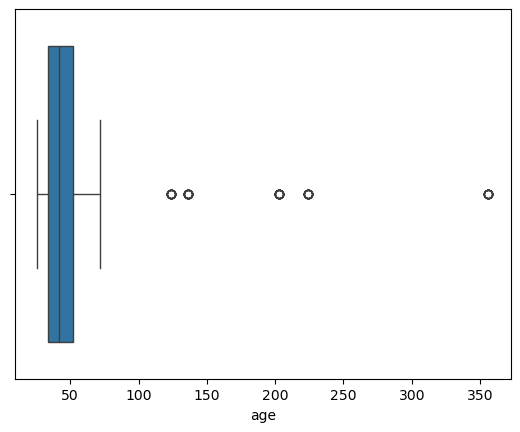

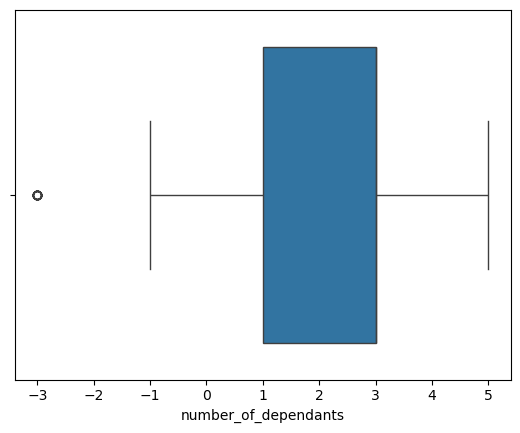

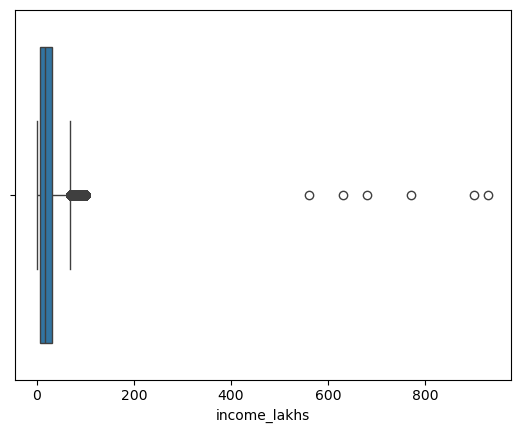

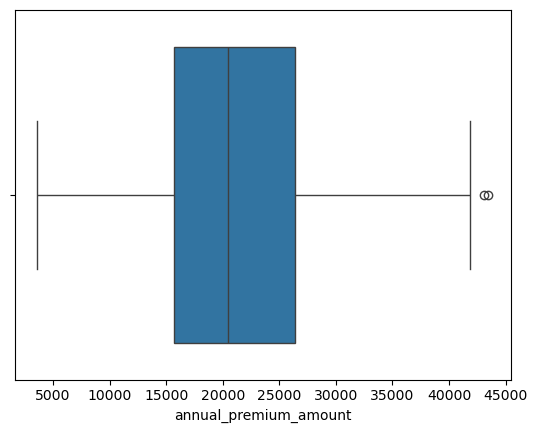

In [18]:
for col in numeric_columns:
    sns.boxplot(x = df[col])
    plt.show()

### Treating outlier in Age 

In [19]:
df[df.age > 100].shape

(58, 13)

In [20]:
df[df.age > 100]['age'].unique()

array([224, 124, 136, 203, 356])

In [21]:
df1 = df[df.age < 100].copy()
df1.describe()

,age,number_of_dependants,income_lakhs,annual_premium_amount
count,29828.000000,29828.000000,29828.000000,29828.000000
mean,43.095380,2.381755,23.371530,20901.900563
std,11.041991,1.430735,24.751262,6928.457636
min,26.000000,-3.000000,1.000000,6538.000000
25%,34.000000,1.000000,7.000000,15706.000000
50%,42.000000,3.000000,17.000000,20496.000000
75%,52.000000,3.000000,32.000000,26361.000000
max,72.000000,5.000000,930.000000,43471.000000


### Treatment of outliers in number_of_dependants Variable

In [22]:
df1[df1.number_of_dependants < 0 ].shape

(50, 13)

In [23]:
df1[df1.number_of_dependants < 0 ]['number_of_dependants'].unique()

array([-1, -3])

In [24]:
df1.number_of_dependants = abs(df1['number_of_dependants'])
df1.number_of_dependants.describe()

count    29828.000000
mean         2.387790
std          1.420641
min          0.000000
25%          1.000000
50%          3.000000
75%          3.000000
max          5.000000
Name: number_of_dependants, dtype: float64

In [25]:
df1.describe()

,age,number_of_dependants,income_lakhs,annual_premium_amount
count,29828.000000,29828.000000,29828.000000,29828.000000
mean,43.095380,2.387790,23.371530,20901.900563
std,11.041991,1.420641,24.751262,6928.457636
min,26.000000,0.000000,1.000000,6538.000000
25%,34.000000,1.000000,7.000000,15706.000000
50%,42.000000,3.000000,17.000000,20496.000000
75%,52.000000,3.000000,32.000000,26361.000000
max,72.000000,5.000000,930.000000,43471.000000


### Outlier treament in Income_lakhs

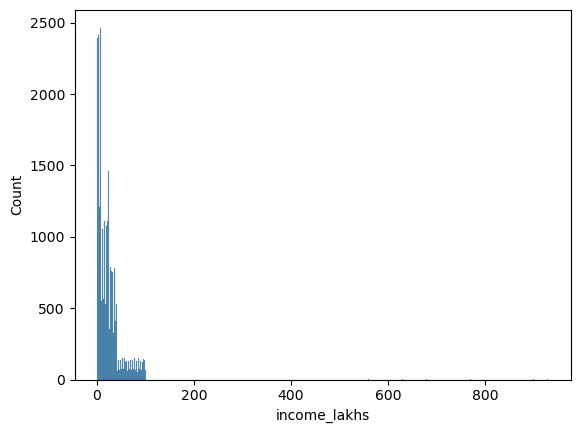

In [26]:
sns.histplot(df1['income_lakhs'])
plt.show()

In [27]:
df1['income_lakhs'].describe(percentiles = [0.25, 0.50, 0.75, 0.90, 0.95 , 0.99, 0.999])

count    29828.000000
mean        23.371530
std         24.751262
min          1.000000
25%          7.000000
50%         17.000000
75%         32.000000
90%         56.000000
95%         78.000000
99%         96.000000
99.9%      100.000000
max        930.000000
Name: income_lakhs, dtype: float64

In [28]:
df1[df1['income_lakhs'] > 100.000000].shape 

(6, 13)

In [29]:
df1['income_lakhs'].quantile([0.25, 0.75])

0.25     7.0
0.75    32.0
Name: income_lakhs, dtype: float64

In [30]:
def get_iqr_bound(col):
    Q1 , Q3 = col.quantile([0.25, 0.75])
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR 
    upper_bound = Q3 + 1.5 * IQR
    return lower_bound , upper_bound

In [31]:
get_iqr_bound(df1['income_lakhs'])

(-30.5, 69.5)

In [32]:
quantile_threshold = df1['income_lakhs'].quantile(0.999)
quantile_threshold

100.0

In [33]:
df1[df1.income_lakhs > quantile_threshold].shape

(6, 13)

In [34]:
df2 = df1[df1.income_lakhs <= quantile_threshold].copy()
df2.describe()

,age,number_of_dependants,income_lakhs,annual_premium_amount
count,29822.000000,29822.000000,29822.000000,29822.000000
mean,43.094896,2.387734,23.226343,20900.689223
std,11.042430,1.420644,22.455408,6928.192115
min,26.000000,0.000000,1.000000,6538.000000
25%,34.000000,1.000000,7.000000,15705.250000
50%,42.000000,3.000000,17.000000,20495.500000
75%,52.000000,3.000000,32.000000,26360.000000
max,72.000000,5.000000,100.000000,43471.000000


In [35]:
df2.head()

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount
0,26,Male,Northwest,Unmarried,0,Normal,No Smoking,Salaried,<10L,6,Diabetes,Bronze,9053
1,29,Female,Southeast,Married,2,Obesity,Regular,Salaried,<10L,6,Diabetes,Bronze,16339
2,49,Female,Northeast,Married,2,Normal,No Smoking,Self-Employed,10L - 25L,20,High blood pressure,Silver,18164
3,30,Female,Southeast,Married,3,Normal,No Smoking,Salaried,> 40L,77,No Disease,Gold,20303
4,56,Male,Northeast,Married,3,Obesity,Occasional,Self-Employed,10L - 25L,14,Diabetes,Bronze,15610


### Examine the Distribution of the Target Column

The target is what we are asked to predict 

In [36]:
df2['annual_premium_amount'].value_counts()

annual_premium_amount
16056    9
26271    9
22800    8
22577    8
20905    8
        ..
11333    1
9669     1
35852    1
16553    1
27076    1
Name: count, Length: 17334, dtype: int64

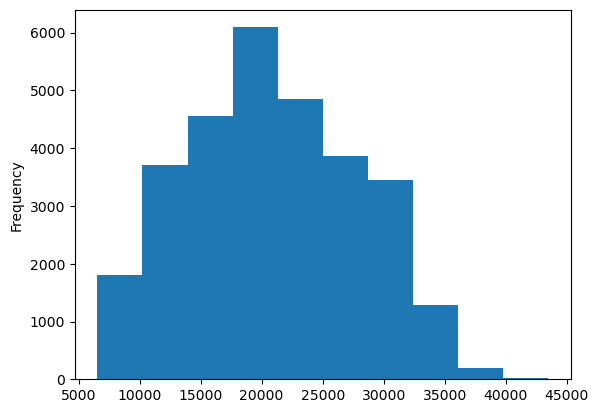

In [37]:
df2['annual_premium_amount'].plot.hist();

#### Plot graphs to visualize Numeric colums such as age,number_of_dependants,income_lakhs,annual_premium_amount.

In [38]:
numeric_columns = df.select_dtypes(['int64']).columns 
numeric_columns

Index(['age', 'number_of_dependants', 'income_lakhs', 'annual_premium_amount'], dtype='object')

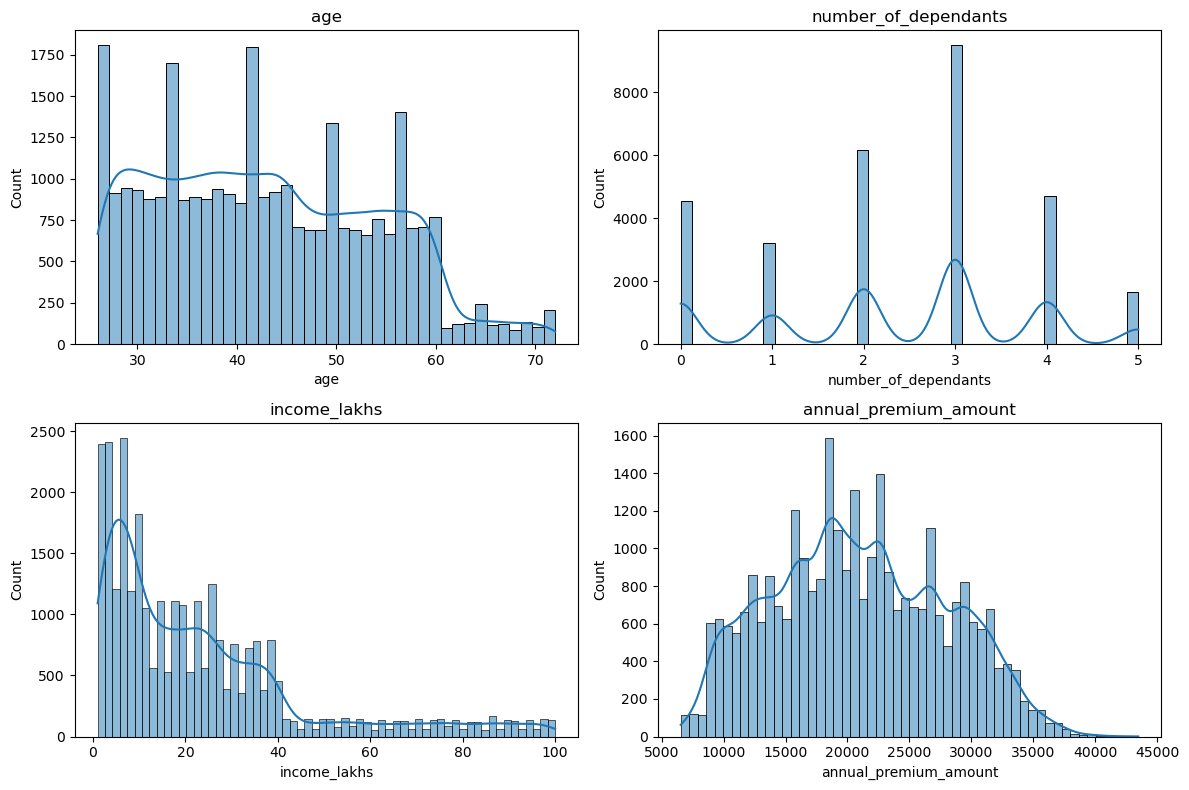

In [39]:
num_rows = 2
# create subplot 
fig, axes = plt.subplots(num_rows , ncols = 2 , figsize = (12, 4 * num_rows))

# Flatten the axes array to make it easier to iterate
axes = axes.flatten()

# create subplot for each categorical columns
for i, col in enumerate(numeric_columns):
    sns.histplot(x = df2[col],ax = axes[i], kde = True)
    axes[i].set_title(col)
    # Rotate x_axis label for better readibility
    #axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation = 45)
# hide any unused subplots
#for i in range(len(col), len(axes)):
    #fig.delaxes(axes[i])
plt.tight_layout()   
plt.show()    

<Axes: xlabel='age', ylabel='annual_premium_amount'>

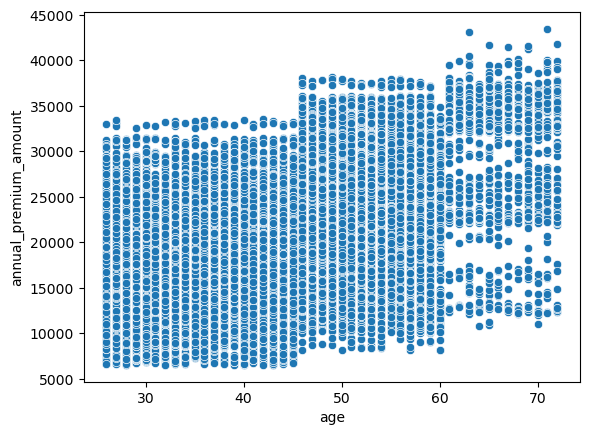

In [40]:
sns.scatterplot(df2 , x = 'age' , y='annual_premium_amount')

Plot graphs to visualize Numeric colums such as age,number_of_dependants,income_lakhs v/s annual_premium_amount.

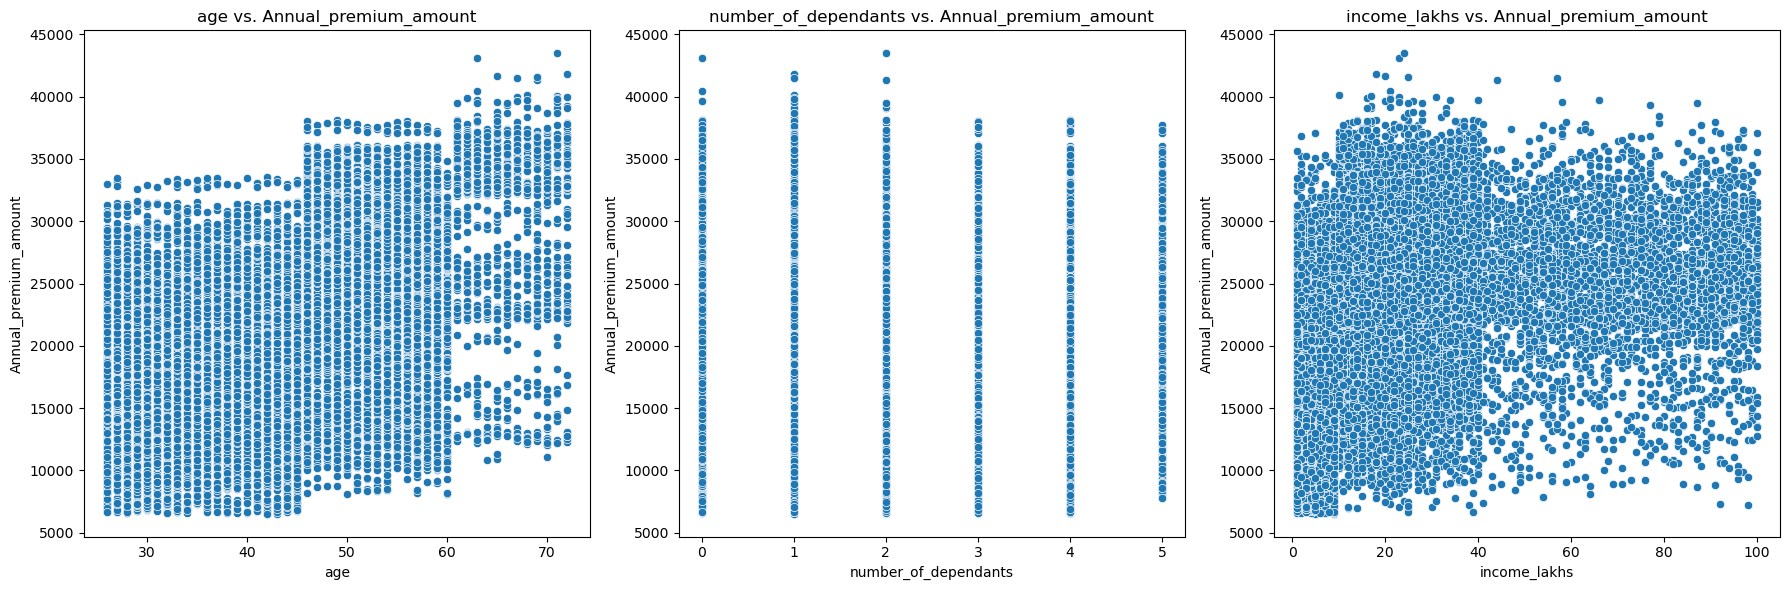

In [41]:
columns_feature = ['age', 'number_of_dependants', 'income_lakhs']
# create subplot 
fig, axes = plt.subplots(1 , len(columns_feature), figsize = (18,6))

# Flatten the axes array to make it easier to iterate
axes = axes.flatten()

# create subplot for each categorical columns
for i, col in enumerate(columns_feature):
    sns.scatterplot(x = df2[col],y = df2['annual_premium_amount'],ax = axes[i])
    axes[i].set_title(f'{col} vs. Annual_premium_amount')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Annual_premium_amount')
    
#Adjust the layout
plt.tight_layout()   
plt.show()    

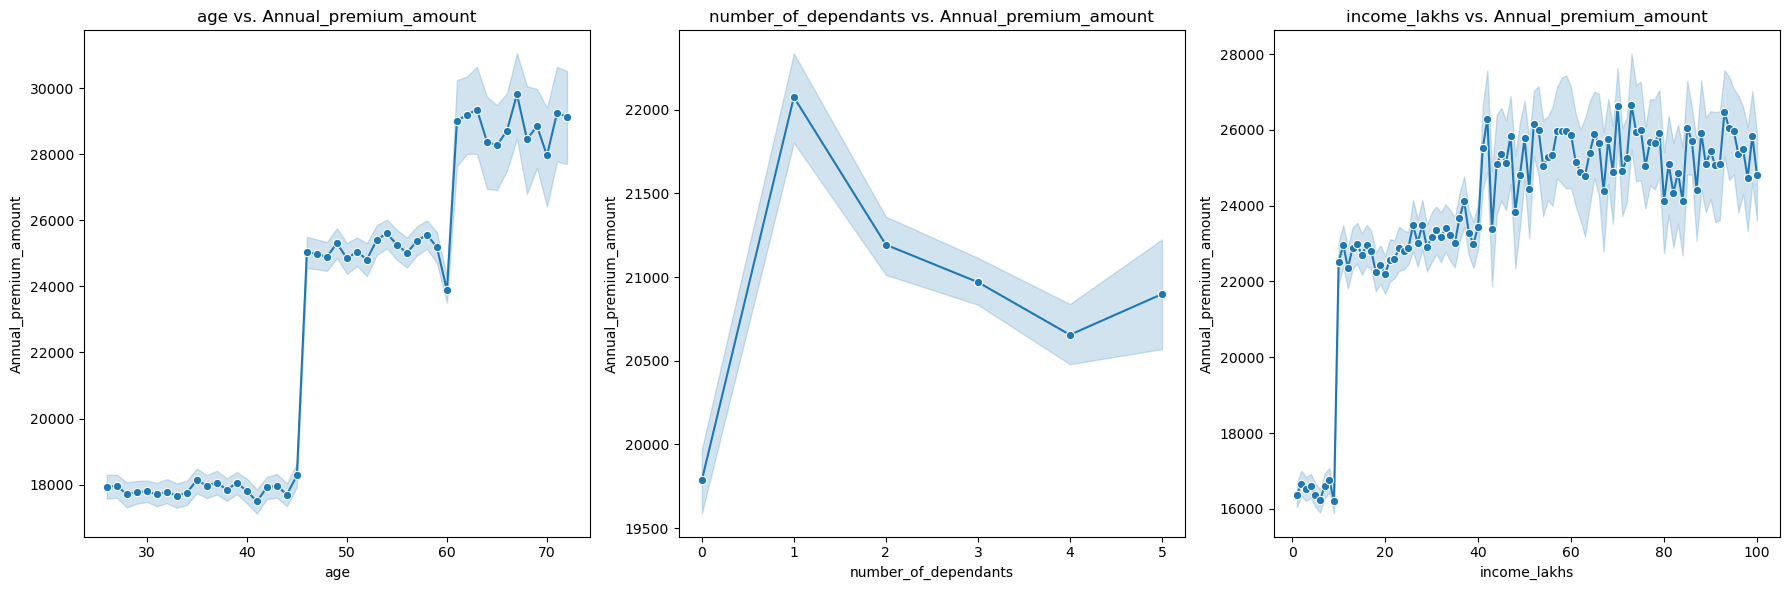

In [42]:
columns_feature = ['age', 'number_of_dependants', 'income_lakhs']
# Create subplots
fig, axes = plt.subplots(1, len(columns_feature), figsize=(18, 6))

# Flatten the axes array
axes = axes.flatten()

# Create line plots for each feature
for i, col in enumerate(columns_feature):
    # Sort the DataFrame by the feature column for proper line plotting
    df2_sorted = df2.sort_values(by=col)  # Sort by the current column

    sns.lineplot(x=df2_sorted[col], y=df2_sorted['annual_premium_amount'], ax=axes[i], marker='o') # Add marker for visibility
    axes[i].set_title(f'{col} vs. Annual_premium_amount')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Annual_premium_amount')

# Adjust the layout
plt.tight_layout()
plt.show()


#### Categorical columns - Check Unique Value in each Columns

In [43]:
categorical_cols = ['gender', 'region', 'marital_status', 'bmi_category', 'smoking_status', 'employment_status', 'income_level',
      'medical_history', 'insurance_plan']

for col in categorical_cols:
    print(col, ":" , df2[col].unique())

gender : ['Male' 'Female']
region : ['Northwest' 'Southeast' 'Northeast' 'Southwest']
marital_status : ['Unmarried' 'Married']
bmi_category : ['Normal' 'Obesity' 'Overweight' 'Underweight']
smoking_status : ['No Smoking' 'Regular' 'Occasional' 'Does Not Smoke' 'Not Smoking'
 'Smoking=0']
employment_status : ['Salaried' 'Self-Employed' 'Freelancer']
income_level : ['<10L' '10L - 25L' '> 40L' '25L - 40L']
medical_history : ['Diabetes' 'High blood pressure' 'No Disease'
 'Diabetes & High blood pressure' 'Thyroid' 'Heart disease'
 'High blood pressure & Heart disease' 'Diabetes & Thyroid'
 'Diabetes & Heart disease']
insurance_plan : ['Bronze' 'Silver' 'Gold']


In [44]:
df2['smoking_status'].replace(
    {
     'Smoking=0' :'No Smoking',
     'Does Not Smoke' : 'No Smoking',
     'Not Smoking':'No Smoking'
    },
inplace = True)
df2.smoking_status.unique()

/var/folders/3l/rgvdw04906v_cqrsrld879880000gn/T/ipykernel_21191/3120975542.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df2['smoking_status'].replace(


array(['No Smoking', 'Regular', 'Occasional'], dtype=object)

In [45]:
# Check treatment in smoking_status
categorical_cols = ['gender', 'region', 'marital_status', 'bmi_category', 'smoking_status', 'employment_status', 'income_level',
      'medical_history', 'insurance_plan']

for col in categorical_cols:
    print(col, ":" , df2[col].unique())

gender : ['Male' 'Female']
region : ['Northwest' 'Southeast' 'Northeast' 'Southwest']
marital_status : ['Unmarried' 'Married']
bmi_category : ['Normal' 'Obesity' 'Overweight' 'Underweight']
smoking_status : ['No Smoking' 'Regular' 'Occasional']
employment_status : ['Salaried' 'Self-Employed' 'Freelancer']
income_level : ['<10L' '10L - 25L' '> 40L' '25L - 40L']
medical_history : ['Diabetes' 'High blood pressure' 'No Disease'
 'Diabetes & High blood pressure' 'Thyroid' 'Heart disease'
 'High blood pressure & Heart disease' 'Diabetes & Thyroid'
 'Diabetes & Heart disease']
insurance_plan : ['Bronze' 'Silver' 'Gold']


In [46]:
pct_count = df2.gender.value_counts(normalize = True)
pct_count 

gender
Male      0.549125
Female    0.450875
Name: proportion, dtype: float64

In [957]:
#sns.barplot(x = pct_count.index , y = pct_count.values)

#### Plot a graphs to visualize the percentage distribution Categorical Columns 

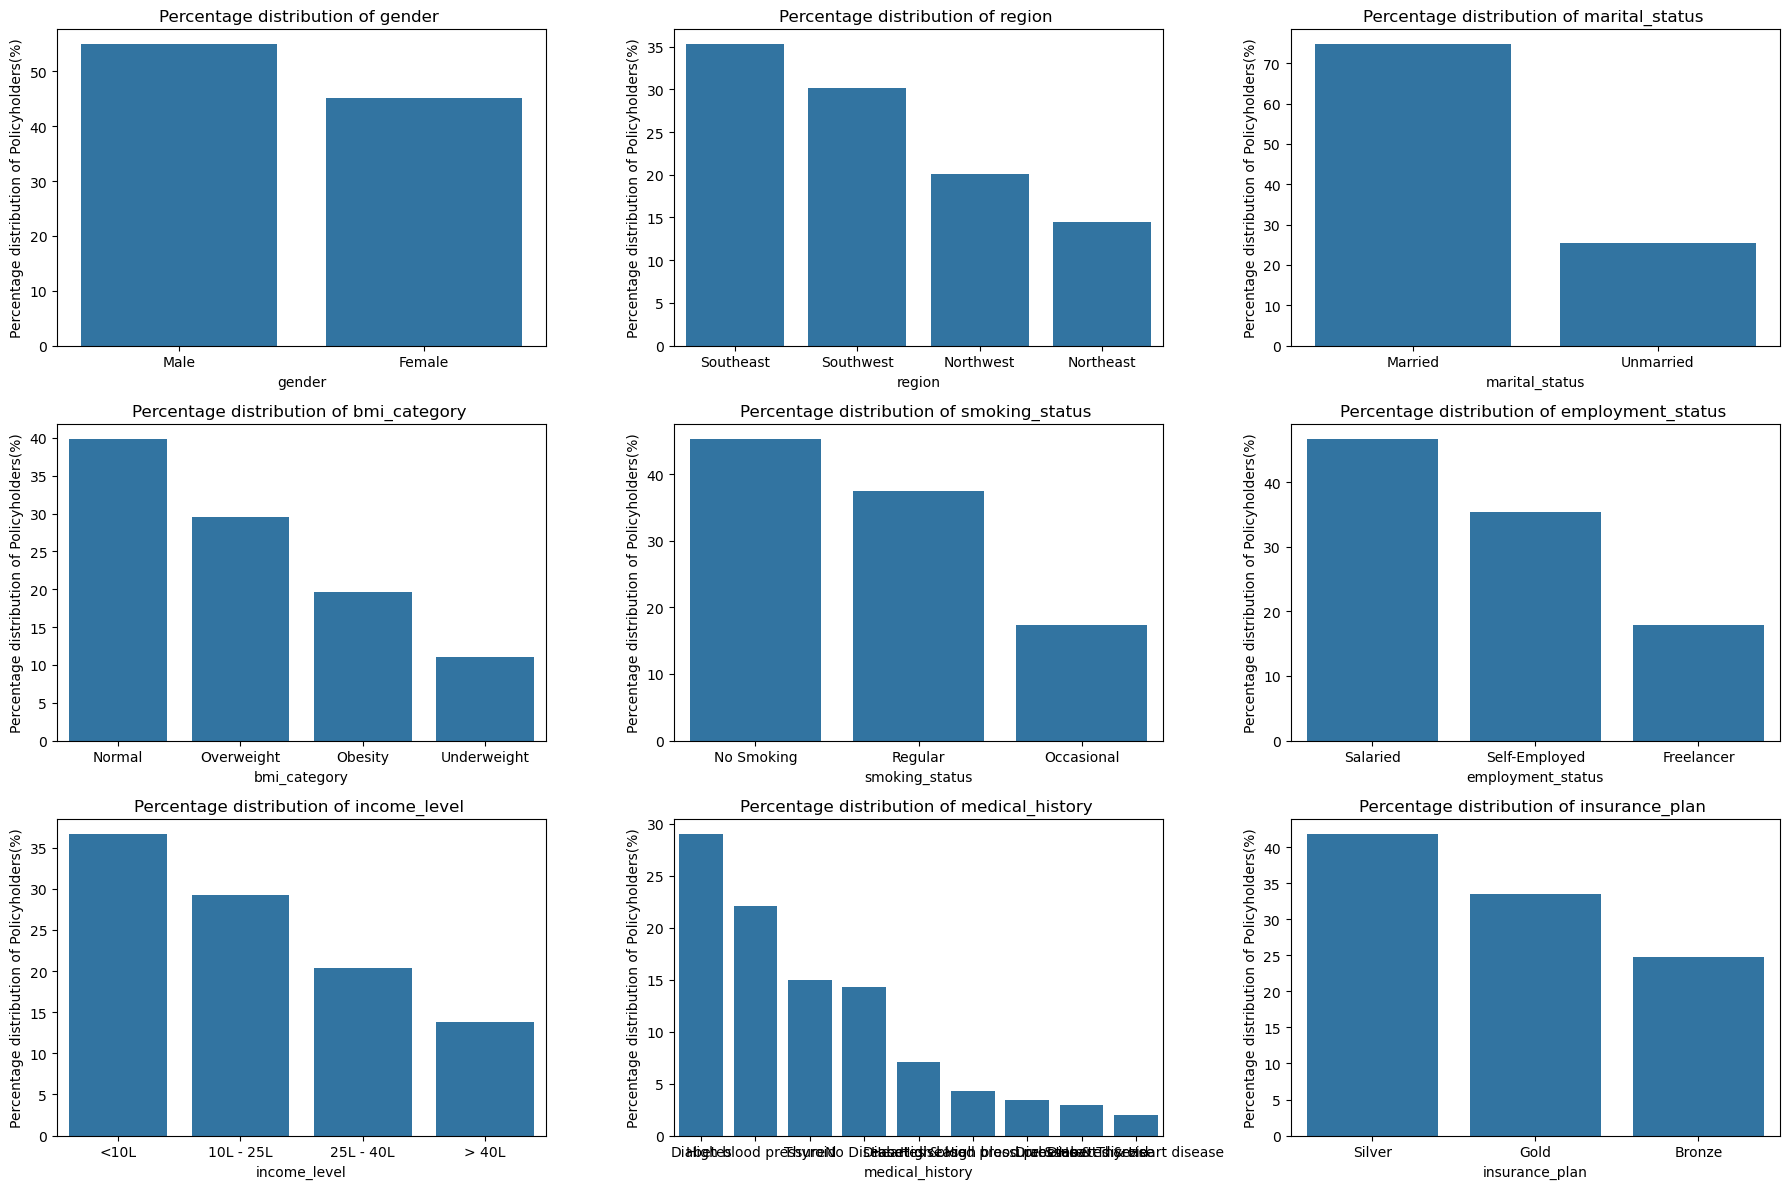

In [47]:
categorical_cols = ['gender', 'region', 'marital_status', 'bmi_category', 'smoking_status', 'employment_status', 'income_level',
      'medical_history', 'insurance_plan']
# create subplot 
fig, axes = plt.subplots(3,3, figsize = (18,12))  # Adjust figsize as necessory

# Flatten the axes array to make it easier to iterate
axes = axes.flatten()

# create subplot for each categorical columns
for i, col in enumerate(categorical_cols):
    # calculate the percentage distribution of each category 
    category_count = df2[col].value_counts(normalize = True) * 100

    # Plotting the distribution using barplot 
    sns.barplot(x = category_count.index,y = category_count.values ,ax = axes[i])
    axes[i].set_title(f'Percentage distribution of {col} ')
    axes[i].set_xlabel(col)  # set xlabel for columns name for better clarity
    axes[i].set_ylabel('Percentage distribution of Policyholders(%)')
    
#Adjust plot parameters for better fit in figure window
plt.tight_layout()   
plt.show()    

insurance_plan  Bronze  Gold  Silver
income_level                        
10L - 25L          799  3554    4354
25L - 40L          301  2631    3142
<10L              6054   527    4341
> 40L              214  3287     618


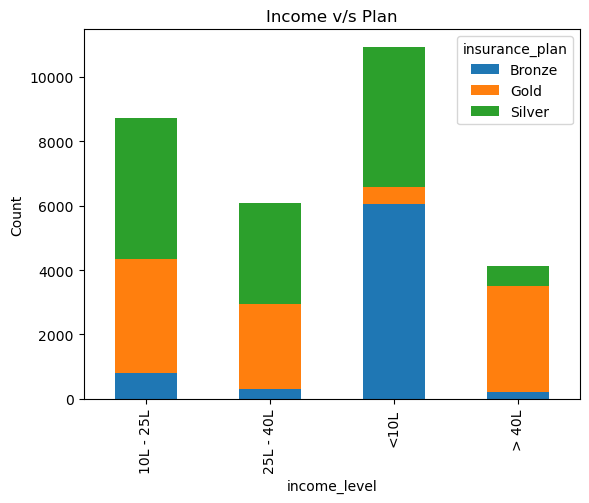

In [48]:
cross_tab = pd.crosstab(df2['income_level'] , df2['insurance_plan'])
print(cross_tab)

cross_tab.plot(kind = "bar", stacked = True)
plt.title('Income v/s Plan')
plt.ylabel('Count')
plt.show()

<Axes: xlabel='insurance_plan', ylabel='income_level'>

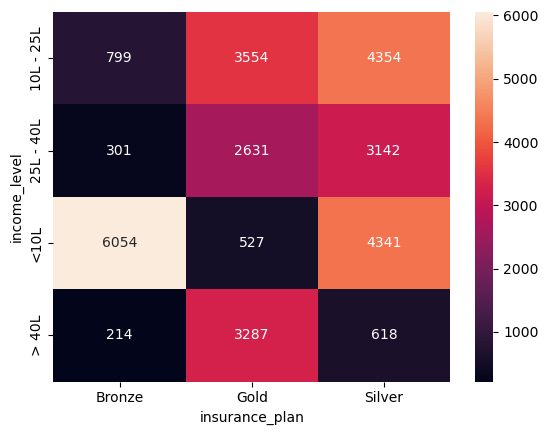

In [49]:
sns.heatmap(cross_tab , annot = True , fmt = 'd')

## Feature Engineering

In [50]:
df2.head()

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount
0,26,Male,Northwest,Unmarried,0,Normal,No Smoking,Salaried,<10L,6,Diabetes,Bronze,9053
1,29,Female,Southeast,Married,2,Obesity,Regular,Salaried,<10L,6,Diabetes,Bronze,16339
2,49,Female,Northeast,Married,2,Normal,No Smoking,Self-Employed,10L - 25L,20,High blood pressure,Silver,18164
3,30,Female,Southeast,Married,3,Normal,No Smoking,Salaried,> 40L,77,No Disease,Gold,20303
4,56,Male,Northeast,Married,3,Obesity,Occasional,Self-Employed,10L - 25L,14,Diabetes,Bronze,15610


In [51]:
df2.columns

Index(['age', 'gender', 'region', 'marital_status', 'number_of_dependants',
       'bmi_category', 'smoking_status', 'employment_status', 'income_level',
       'income_lakhs', 'medical_history', 'insurance_plan',
       'annual_premium_amount'],
      dtype='object')

In [52]:
df2.shape

(29822, 13)

### Label encodeing for ordinal data

In [53]:
df2.medical_history.unique()

array(['Diabetes', 'High blood pressure', 'No Disease',
       'Diabetes & High blood pressure', 'Thyroid', 'Heart disease',
       'High blood pressure & Heart disease', 'Diabetes & Thyroid',
       'Diabetes & Heart disease'], dtype=object)

In [54]:
risk_scores = ({
    'diabetes': 6,
    'heart disease': 8,
    'high blood pressure': 6, 
    'thyroid' : 5 ,
    'no disease': 0,
    'none': 0
})     

In [55]:
df2.medical_history.str.split(" & ", expand = True )

,0,1
0,Diabetes,None
1,Diabetes,None
2,High blood pressure,None
3,No Disease,None
4,Diabetes,None
...,...,...
29899,High blood pressure,None
29900,Diabetes,Thyroid
29901,No Disease,None
29902,Thyroid,None


In [56]:
df2[['disease1','disease2']] = df2.medical_history.str.split(" & ", expand = True ).apply(lambda x : x.str.lower())

In [57]:
df2['disease2'].value_counts(dropna = False)

disease2
None                   26058
heart disease           1595
high blood pressure     1288
thyroid                  881
Name: count, dtype: int64

In [58]:
df2.fillna({'disease1':'none'}, inplace = True)
df2.fillna({'disease2':'none'}, inplace = True)

In [59]:
df2['total_risk_score'] = 0 

for disease in ['disease1','disease2']:
   df2['total_risk_score'] = df2['total_risk_score'] + df2[disease].map(risk_scores)


In [60]:
max_score = df2['total_risk_score'].max()
min_score = df2['total_risk_score'].min()
df2['normalized_risk_score'] = (df2['total_risk_score'] - min_score )/(max_score - min_score)

In [61]:
df2.head()

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,disease1,disease2,total_risk_score,normalized_risk_score
0,26,Male,Northwest,Unmarried,0,Normal,No Smoking,Salaried,<10L,6,Diabetes,Bronze,9053,diabetes,none,6,0.428571
1,29,Female,Southeast,Married,2,Obesity,Regular,Salaried,<10L,6,Diabetes,Bronze,16339,diabetes,none,6,0.428571
2,49,Female,Northeast,Married,2,Normal,No Smoking,Self-Employed,10L - 25L,20,High blood pressure,Silver,18164,high blood pressure,none,6,0.428571
3,30,Female,Southeast,Married,3,Normal,No Smoking,Salaried,> 40L,77,No Disease,Gold,20303,no disease,none,0,0.000000
4,56,Male,Northeast,Married,3,Obesity,Occasional,Self-Employed,10L - 25L,14,Diabetes,Bronze,15610,diabetes,none,6,0.428571


In [62]:
df2['normalized_risk_score'].isna().sum()

0

In [63]:
df2.insurance_plan.unique()

array(['Bronze', 'Silver', 'Gold'], dtype=object)

In [64]:
df2['insurance_plan'] = df2['insurance_plan'].map({'Bronze':1 ,'Silver': 2,'Gold': 3})

In [65]:
df2.insurance_plan.unique()

array([1, 2, 3])

In [66]:
df2.income_level.unique()

array(['<10L', '10L - 25L', '> 40L', '25L - 40L'], dtype=object)

In [67]:
df2.income_level = df2['income_level'].map({'<10L':1, '10L - 25L':2, '25L - 40L':3,'> 40L':4})

In [68]:
df2.income_level.unique()

array([1, 2, 4, 3])

#### One - hot encoding for Nominal columns

In [69]:
df2.columns

Index(['age', 'gender', 'region', 'marital_status', 'number_of_dependants',
       'bmi_category', 'smoking_status', 'employment_status', 'income_level',
       'income_lakhs', 'medical_history', 'insurance_plan',
       'annual_premium_amount', 'disease1', 'disease2', 'total_risk_score',
       'normalized_risk_score'],
      dtype='object')

In [70]:
nominal_cols = ['gender','region','marital_status','bmi_category','smoking_status','employment_status']
df3 = pd.get_dummies(df2 , columns = nominal_cols, drop_first = True, dtype = int)      

In [71]:
df3.head()

,age,number_of_dependants,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,disease1,disease2,total_risk_score,...,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
0,26,0,1,6,Diabetes,1,9053,diabetes,none,6,...,0,0,1,0,0,0,0,0,1,0
1,29,2,1,6,Diabetes,1,16339,diabetes,none,6,...,1,0,0,1,0,0,0,1,1,0
2,49,2,2,20,High blood pressure,2,18164,high blood pressure,none,6,...,0,0,0,0,0,0,0,0,0,1
3,30,3,4,77,No Disease,3,20303,no disease,none,0,...,1,0,0,0,0,0,0,0,1,0
4,56,3,2,14,Diabetes,1,15610,diabetes,none,6,...,0,0,0,1,0,0,1,0,0,1


In [72]:
df4 = df3.drop(['medical_history','disease1','disease2','total_risk_score'], axis = 1)
df4.head()

,age,number_of_dependants,income_level,income_lakhs,insurance_plan,annual_premium_amount,normalized_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
0,26,0,1,6,1,9053,0.428571,1,1,0,0,1,0,0,0,0,0,1,0
1,29,2,1,6,1,16339,0.428571,0,0,1,0,0,1,0,0,0,1,1,0
2,49,2,2,20,2,18164,0.428571,0,0,0,0,0,0,0,0,0,0,0,1
3,30,3,4,77,3,20303,0.000000,0,0,1,0,0,0,0,0,0,0,1,0
4,56,3,2,14,1,15610,0.428571,1,0,0,0,0,1,0,0,1,0,0,1


### Correlation 

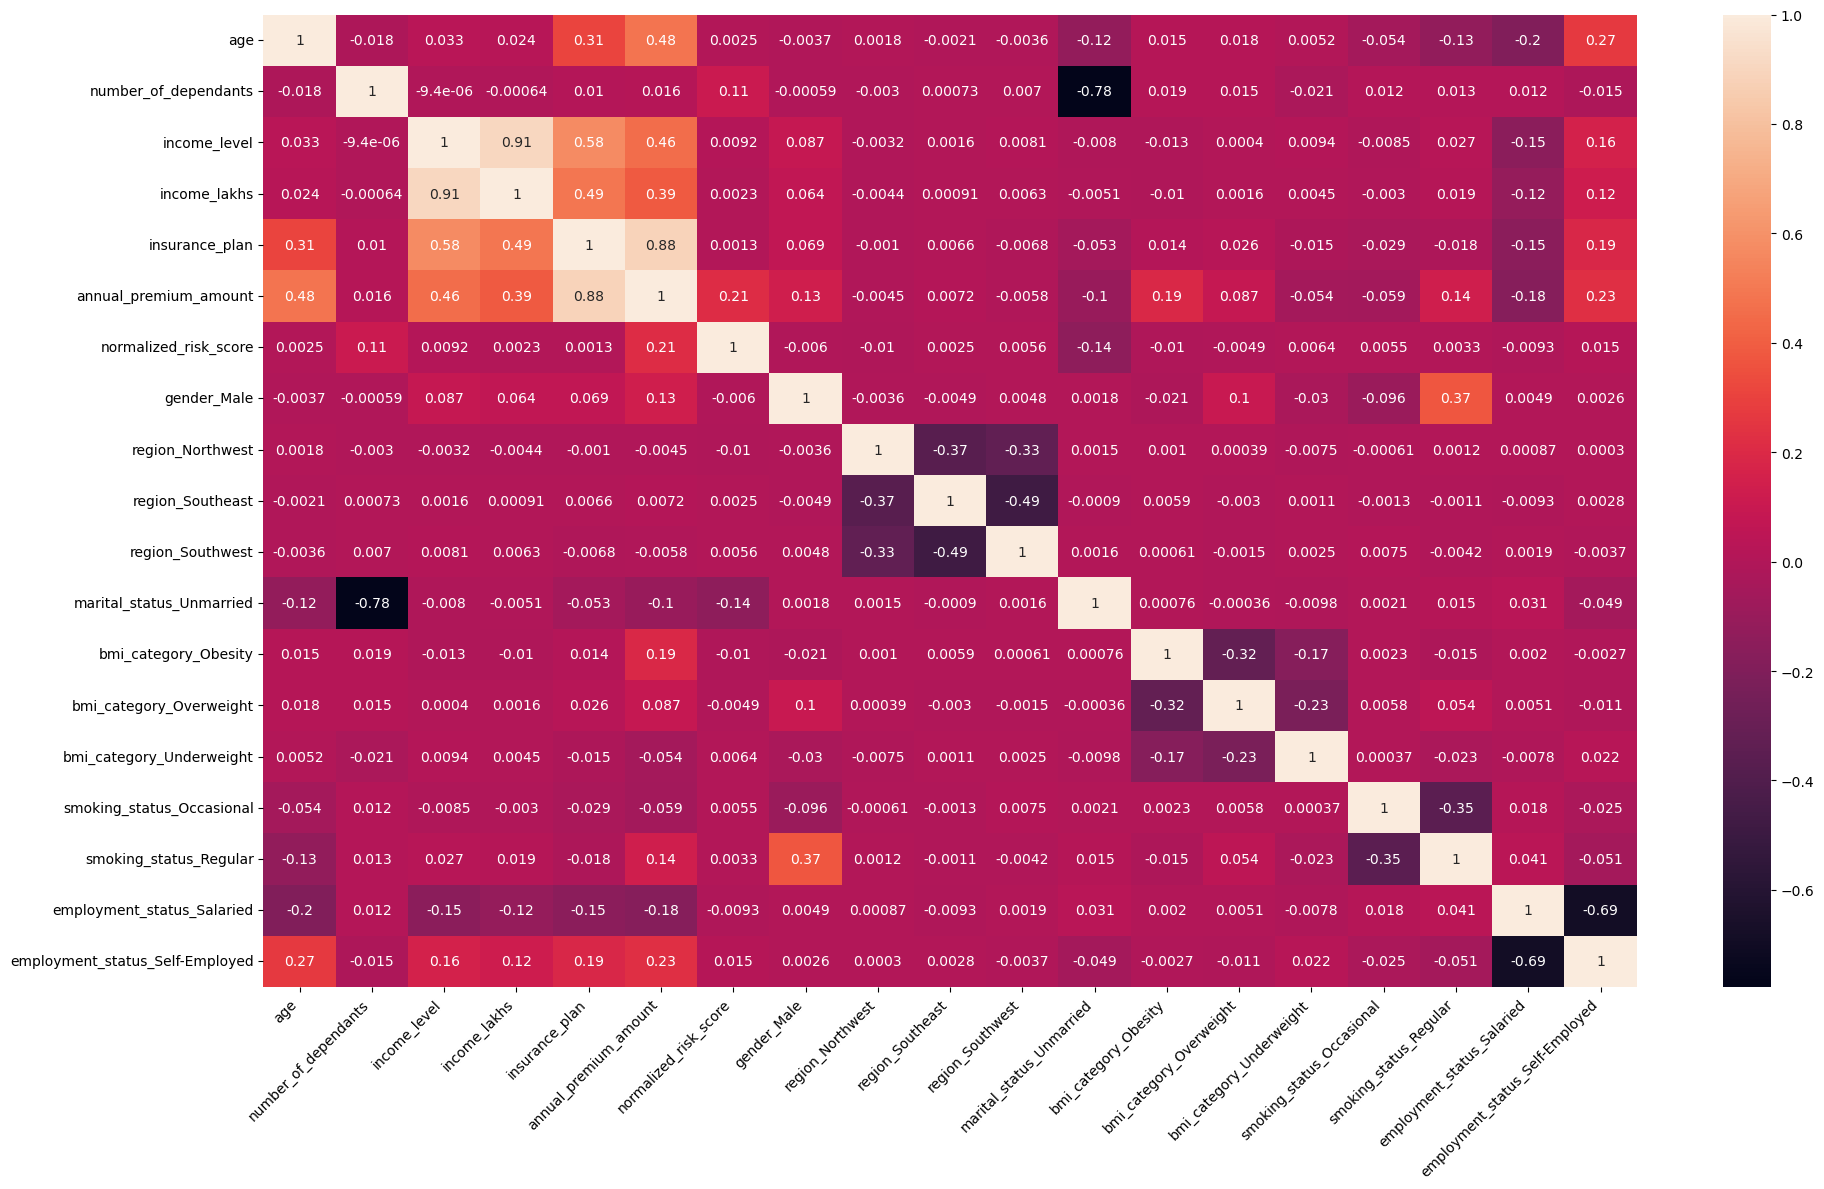

In [73]:
cm = df4.corr()
plt.figure(figsize=(20,12)) 
sns.heatmap(cm, annot=True)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

### Scaling the Numeric data 

In [74]:
df4.head(2)

,age,number_of_dependants,income_level,income_lakhs,insurance_plan,annual_premium_amount,normalized_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
0,26,0,1,6,1,9053,0.428571,1,1,0,0,1,0,0,0,0,0,1,0
1,29,2,1,6,1,16339,0.428571,0,0,1,0,0,1,0,0,0,1,1,0


In [75]:
df4.columns

Index(['age', 'number_of_dependants', 'income_level', 'income_lakhs',
       'insurance_plan', 'annual_premium_amount', 'normalized_risk_score',
       'gender_Male', 'region_Northwest', 'region_Southeast',
       'region_Southwest', 'marital_status_Unmarried', 'bmi_category_Obesity',
       'bmi_category_Overweight', 'bmi_category_Underweight',
       'smoking_status_Occasional', 'smoking_status_Regular',
       'employment_status_Salaried', 'employment_status_Self-Employed'],
      dtype='object')

In [76]:
X = df4.drop('annual_premium_amount', axis = 'columns')
y = df4['annual_premium_amount']

from sklearn.preprocessing import MinMaxScaler
cols_to_scale = ['age','number_of_dependants','income_level','income_lakhs','insurance_plan']
scaler = MinMaxScaler()
X[cols_to_scale] = scaler.fit_transform(X[cols_to_scale])


In [77]:
X

,age,number_of_dependants,income_level,income_lakhs,insurance_plan,normalized_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
0,0.000000,0.0,0.000000,0.050505,0.0,0.428571,1,1,0,0,1,0,0,0,0,0,1,0
1,0.065217,0.4,0.000000,0.050505,0.0,0.428571,0,0,1,0,0,1,0,0,0,1,1,0
2,0.500000,0.4,0.333333,0.191919,0.5,0.428571,0,0,0,0,0,0,0,0,0,0,0,1
3,0.086957,0.6,1.000000,0.767677,1.0,0.000000,0,0,1,0,0,0,0,0,0,0,1,0
4,0.652174,0.6,0.333333,0.131313,0.0,0.428571,1,0,0,0,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29899,0.739130,0.6,0.666667,0.252525,1.0,0.428571,0,1,0,0,0,0,0,0,0,0,0,1
29900,0.304348,0.0,0.333333,0.151515,1.0,0.785714,0,0,1,0,1,0,1,0,0,1,1,0
29901,0.239130,0.0,0.000000,0.030303,0.0,0.000000,0,1,0,0,1,1,0,0,0,0,1,0
29902,0.456522,0.4,1.000000,0.818182,1.0,0.357143,0,0,1,0,0,0,0,0,0,0,1,0


### Variance Inflation factor - to reduce Multicollinarity 

In [78]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(data):
    vif_df = pd.DataFrame()
    vif_df['Column'] = data.columns
    vif_df['VIF'] = [variance_inflation_factor(data.values,i) for i in range(data.shape[1])]
    return vif_df

In [79]:
calculate_vif(X)

,Column,VIF
0,age,3.921783
1,number_of_dependants,6.278938
2,income_level,13.890522
3,income_lakhs,11.185596
4,insurance_plan,5.271297
5,normalized_risk_score,3.810619
6,gender_Male,2.599098
7,region_Northwest,2.123965
8,region_Southeast,2.980842
9,region_Southwest,2.710097


In [80]:
calculate_vif(X.drop('income_level', axis = 'columns'))

,Column,VIF
0,age,3.863055
1,number_of_dependants,6.278147
2,income_lakhs,2.678102
3,insurance_plan,4.574625
4,normalized_risk_score,3.808345
5,gender_Male,2.591439
6,region_Northwest,2.123277
7,region_Southeast,2.979899
8,region_Southwest,2.708641
9,marital_status_Unmarried,2.345757


In [81]:
X_reduced = X.drop('income_level', axis = 'columns')
X_reduced.head()

,age,number_of_dependants,income_lakhs,insurance_plan,normalized_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
0,0.000000,0.0,0.050505,0.0,0.428571,1,1,0,0,1,0,0,0,0,0,1,0
1,0.065217,0.4,0.050505,0.0,0.428571,0,0,1,0,0,1,0,0,0,1,1,0
2,0.500000,0.4,0.191919,0.5,0.428571,0,0,0,0,0,0,0,0,0,0,0,1
3,0.086957,0.6,0.767677,1.0,0.000000,0,0,1,0,0,0,0,0,0,0,1,0
4,0.652174,0.6,0.131313,0.0,0.428571,1,0,0,0,0,1,0,0,1,0,0,1


# Model Training 

In [82]:
X_reduced.sample(5)

,age,number_of_dependants,income_lakhs,insurance_plan,normalized_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
20962,0.239130,0.8,0.040404,0.0,1.000000,1,0,1,0,0,0,1,0,0,1,0,0
20681,0.543478,0.0,0.010101,0.5,0.357143,0,0,1,0,1,1,0,0,0,0,1,0
22212,0.347826,0.4,0.080808,0.0,0.000000,0,0,1,0,1,0,1,0,1,0,1,0
7071,0.282609,0.4,0.515152,1.0,0.428571,1,1,0,0,0,0,0,0,0,1,0,1
25668,0.739130,0.0,0.121212,1.0,0.571429,1,0,1,0,1,0,0,0,0,1,0,1


In [83]:
X_train , X_test , y_train ,y_test = train_test_split(X_reduced , y, test_size = 0.3, random_state = 10)
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)

X_train: (20875, 17)
X_test: (8947, 17)
y_train: (20875,)
y_test: (8947,)


### Linear Regression Model and Evaluation Metrics

In [85]:
X_train.columns

Index(['age', 'number_of_dependants', 'income_lakhs', 'insurance_plan',
       'normalized_risk_score', 'gender_Male', 'region_Northwest',
       'region_Southeast', 'region_Southwest', 'marital_status_Unmarried',
       'bmi_category_Obesity', 'bmi_category_Overweight',
       'bmi_category_Underweight', 'smoking_status_Occasional',
       'smoking_status_Regular', 'employment_status_Salaried',
       'employment_status_Self-Employed'],
      dtype='object')

In [86]:
# Initialize the LinearRegression
model_lr = LinearRegression()

# Train the model (assuming you have X_train and y_train)

model_lr.fit(X_train , y_train)

# Model coefficient and intercept 
print("Model coefficient is",model_lr.coef_)
print("Model intercept is",model_lr.intercept_)
print()

# Evaluate the model score
train_score= model_lr.score(X_train , y_train)
test_score = model_lr.score(X_test , y_test)
print(f'Model score for train data is {train_score}')
print(f'Model score for test data is {test_score}')
print()

# Make predictions (assuming you have X_test)
y_pred_lr = model_lr.predict(X_test)

# Evaluate the model (example using Mean squared error and R - squared) 
mse = mean_squared_error(y_test, y_pred_lr)
r2 = r2_score(y_test , y_pred_lr)
print(f"Mean squared error is {mse}")
print(f"R - squared is {r2}")

Model coefficient is [ 7016.2393283  -1311.76470171  -708.19336921 14835.98820801
  6053.6241234     37.55826883   -55.25087215   -19.62254288
   -22.28967559  -700.32019985  3926.8127061   1979.45604663
   612.86623617   837.3951011   2800.66184334   -45.49136706
   243.07842087]
Model intercept is 5935.981289344578

Model score for train data is 0.9534163989489616
Model score for test data is 0.9538448451629948

Mean squared error is 2183844.360312455
R - squared is 0.9538448451629948


In [87]:
X_test.columns

Index(['age', 'number_of_dependants', 'income_lakhs', 'insurance_plan',
       'normalized_risk_score', 'gender_Male', 'region_Northwest',
       'region_Southeast', 'region_Southwest', 'marital_status_Unmarried',
       'bmi_category_Obesity', 'bmi_category_Overweight',
       'bmi_category_Underweight', 'smoking_status_Occasional',
       'smoking_status_Regular', 'employment_status_Salaried',
       'employment_status_Self-Employed'],
      dtype='object')

In [88]:
feature_importance  = model_lr.coef_
coef_df = pd.DataFrame(feature_importance , index = X_test.columns,columns = ['Coefficients'])
coef_df.sort_values(by = 'Coefficients' , ascending = True)

,Coefficients
number_of_dependants,-1311.764702
income_lakhs,-708.193369
marital_status_Unmarried,-700.320200
region_Northwest,-55.250872
employment_status_Salaried,-45.491367
region_Southwest,-22.289676
region_Southeast,-19.622543
gender_Male,37.558269
employment_status_Self-Employed,243.078421
bmi_category_Underweight,612.866236


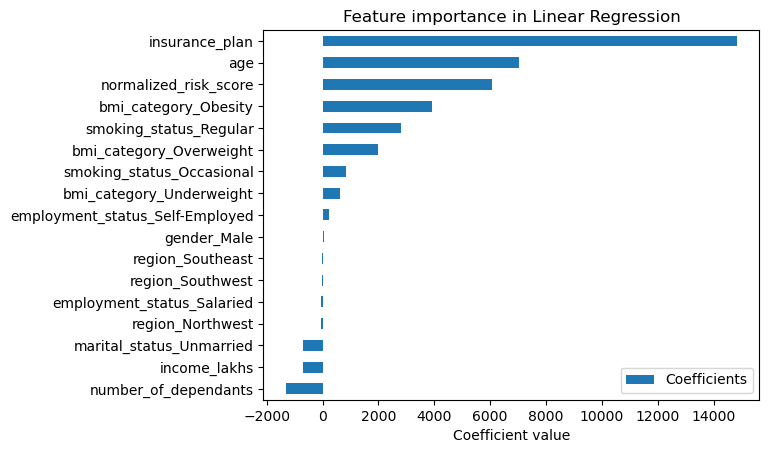

In [89]:
coef_df.sort_values(by = 'Coefficients' , ascending = True).plot(kind = 'barh')
plt.title("Feature importance in Linear Regression")
plt.xlabel("Coefficient value")
plt.show()

### Linear Regression Model- Ridge Regularization and Evaluation Metrics

In [90]:
# Initialize the Ridge
model_rg = Ridge(alpha = 10)

# Train the model (assuming you have X_train and y_train) and calcualte Model score 
model_rg.fit(X_train , y_train)
train_score_rg= model_rg.score(X_train , y_train)
test_score_rg = model_rg.score(X_test , y_test)
print(f'Model score for train data {train_score_rg}')
print(f'Model score for test data {test_score_rg}')

# Make predictions (assuming you have X_test)
y_pred_rg = model_rg.predict(X_test)

# Evaluate the model (example using Mean squared error and R - squared) 
mse = mean_squared_error(y_test, y_pred_rg)
r2 = r2_score(y_test , y_pred_rg)
print(f"Mean squared error is {mse}")
print(f"R - squared is {r2}")

Model score for train data 0.9534000354275609
Model score for test data 0.9538387998701963
Mean squared error is 2184130.3950713295
R - squared is 0.9538387998701963


## XGBoost Regressor 

In [106]:
from xgboost import XGBRegressor

# Initialize the XGBRegressor
model_xgb = XGBRegressor()  # Or with specific parameters

# Train the model (assuming you have X_train and y_train)
model_xgb.fit(X_train, y_train)
train_score_xgb = model_xgb.score(X_train , y_train)
test_score_xgb  = model_xgb.score(X_test , y_test)
print(f'Model score for train data {train_score_xgb}')
print(f'Model score for test data {test_score_xgb}')

# Make predictions (assuming you have X_test)
y_pred_xgb = model_xgb.predict(X_test)

# Evaluate the model (example using Mean squared error and R - squared) 
mse = mean_squared_error(y_test, y_pred_xgb)
rmse = np.sqrt(mse)
r2 = r2_score(y_test , y_pred_xgb)
print(f"Mean squared error is {mse}")
print(f"Root Mean squared error is {rmse}")
print(f"R - squared is {r2}")

Model score for train data 0.9986370761718086
Model score for test data 0.9979538491004899
Mean squared error is 96814.21540071907
Root Mean squared error is 311.14982789762087
R - squared is 0.9979538491004899


In [ ]:
## You donot need to run randomised search cv as you already get accuracy of 99% through Xgboost model 

## Randomized SearchCV 

In [121]:
model_xgb = XGBRegressor()
param_grid = {
    'n_estimators': [20, 40, 50],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    }
random_search = RandomizedSearchCV(model_xgb, param_grid, n_iter=10, cv=3, scoring='r2', random_state = 42, n_jobs=-1)
random_search.fit(X_train, y_train)
random_search.best_score_

0.9970577807993951

In [532]:
#df_result_cv = pd.DataFrame(random_search.cv_results_)
#df_result_cv[[ 'param_n_estimators','param_max_depth','params','mean_test_score']]

In [122]:
random_search.best_params_

{'n_estimators': 50, 'max_depth': 5, 'learning_rate': 0.1}

In [124]:
#best_model = random_search.best_estimator_
#best_model

In [100]:
#feature_importance  = best_model.feature_importance_

#coef_df = pd.DataFrame(feature_importance , index = X_test.columns,columns = ['Coefficients'])
#coef_df.sort_values(by = 'Coefficients' , ascending = True).plot(kind = 'barh')
#plt.title("Feature importance in XGBoost")
#plt.xlabel("Coefficient value")
#plt.show()

# Error Analysis

In [125]:
y_pred = best_model.predict(X_test)

In [126]:
y_pred

array([26691.47 , 22650.752, 21581.895, ..., 12230.323, 29558.56 ,
       28924.584], dtype=float32)

In [127]:
y_test

19713    26895
14750    22734
19932    21198
29643     9100
17076    26434
         ...  
3387      9291
7858     18261
9744     12419
4849     29735
8986     29289
Name: annual_premium_amount, Length: 8947, dtype: int64

In [128]:
residuals = y_pred - y_test 
residuals_pct = (residuals * 100) / y_test 
residuals_pct

19713   -0.756755
14750   -0.366183
19932    1.810994
29643    3.581699
17076    0.974013
           ...   
3387     1.452315
7858    -1.947938
9744    -1.519259
4849    -0.593373
8986    -1.244208
Name: annual_premium_amount, Length: 8947, dtype: float64

In [129]:
result_df = pd.DataFrame(
    {
        'actual' : y_test,
        'predicted' : y_pred,
        'diff' : residuals,
        'diff_pct' : residuals_pct

    })
result_df.head()

,actual,predicted,diff,diff_pct
19713,26895,26691.470703,-203.529297,-0.756755
14750,22734,22650.751953,-83.248047,-0.366183
19932,21198,21581.894531,383.894531,1.810994
29643,9100,9425.934570,325.934570,3.581699
17076,26434,26691.470703,257.470703,0.974013


In [130]:
result_df.shape

(8947, 4)

<Axes: xlabel='diff_pct', ylabel='Count'>

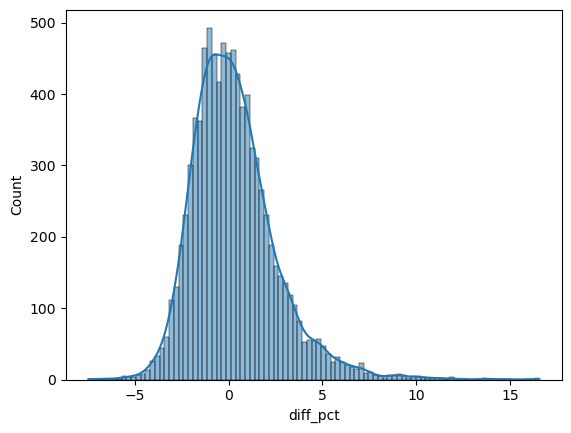

In [131]:
sns.histplot(result_df.diff_pct , kde = True)

In [132]:
extreme_error_threshold = 10
extreme_result_df = result_df[np.abs(result_df['diff_pct']) > extreme_error_threshold ]
extreme_result_df.shape


(29, 4)

In [133]:
result_df.shape

(8947, 4)

In [134]:
# Total error percentage in model 
extreme_error_pct = extreme_result_df.shape[0] * 100 / result_df.shape[0]
extreme_error_pct

# It means model 0.3% predictions are incorrect 

0.32413099362914943

In [135]:
result_df[np.abs(result_df['diff_pct']) > 50].sort_values(by = 'diff_pct', ascending = False).shape

(0, 4)

## You donot need further examination to find out the exact reason for error , as error is just 0.32% you can ignore it , and use the modle 

In [ ]:
## Try to find out what are the root cause for such high margin of errors

In [136]:
#extreme_result_df.head()

In [137]:
#extreme_result_df.columns

In [138]:
#extreme_result_df.index

In [139]:
# X_test.head()

In [140]:
# X_test contain indexes of extreme_result_df beause extreme_result_df are part of  X_test- that show high margin error)
#X_test.index

In [141]:
# X_test.shape

In [142]:
# Creating a seperate dataframe to represent error margin (extreme_result_df) in original X_test 
# extreme_error_df = X_test.loc[extreme_result_df.index]
# extreme_error_df.shape

In [143]:
# Actual error in original X_test that are showing wrong prediction 
# extreme_error_df.head(1)

In [1041]:
# extreme_error_df.columns

Index(['age', 'number_of_dependants', 'income_lakhs', 'insurance_plan',
       'normalized_risk_score', 'gender_Male', 'region_Northwest',
       'region_Southeast', 'region_Southwest', 'marital_status_Unmarried',
       'bmi_category_Obesity', 'bmi_category_Overweight',
       'bmi_category_Underweight', 'smoking_status_Occasional',
       'smoking_status_Regular', 'employment_status_Salaried',
       'employment_status_Self-Employed'],
      dtype='object')

In [1042]:
# X_test.head(1)

,age,number_of_dependants,income_lakhs,insurance_plan,normalized_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
3598,0.481481,0.4,0.343434,0.5,0.428571,1,0,1,0,1,0,1,0,0,1,1,0


In [1043]:
# X_test.columns

Index(['age', 'number_of_dependants', 'income_lakhs', 'insurance_plan',
       'normalized_risk_score', 'gender_Male', 'region_Northwest',
       'region_Southeast', 'region_Southwest', 'marital_status_Unmarried',
       'bmi_category_Obesity', 'bmi_category_Overweight',
       'bmi_category_Underweight', 'smoking_status_Occasional',
       'smoking_status_Regular', 'employment_status_Salaried',
       'employment_status_Self-Employed'],
      dtype='object')

<Axes: xlabel='income_lakhs', ylabel='Count'>

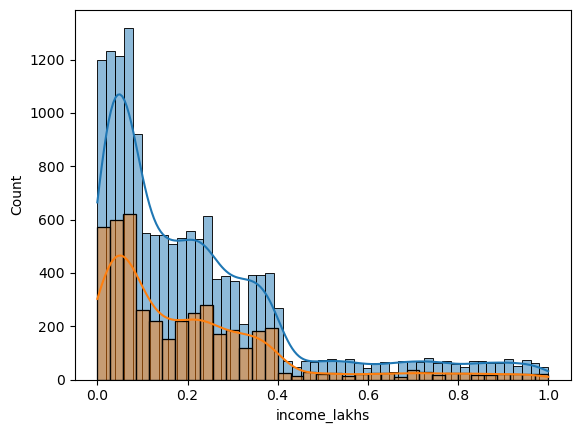

In [1044]:
# sns.histplot(X_test.income_lakhs ,label = 'overall', kde = True)
# sns.histplot(extreme_error_df.income_lakhs, label = 'Extreme Error',kde = True)  

In [144]:
# extreme_error_df.head()

### Analyize the feature which are responsilbe for giving higher error 

In [145]:
#for feature in X_test.columns:
#    plt.figure(figsize=(10, 4))
#    sns.histplot(extreme_error_df[feature], color='red', label='Extreme Errors', kde=True)
#    sns.histplot(X_test[feature], color='blue', label='Overall', alpha=0.5, kde=True)
#    plt.legend()
#    plt.title(f'Distribution of {feature} for Extreme Errors vs Overall')
#    plt.show()

In [146]:
# sns.histplot(extreme_error_df['age'] , kde = True)

In [147]:
# cols_to_scale

In [148]:
# extreme_error_df.columns

In [1050]:
# extreme_error_df['income_level'] = -1

In [1051]:
# df_reversed = pd.DataFrame()
# df_reversed[cols_to_scale] = scaler.inverse_transform(extreme_error_df[cols_to_scale])
# df_reversed

,age,number_of_dependants,income_level,income_lakhs,insurance_plan
0,23.0,1.0,-2.0,14.0,1.0
1,19.0,1.0,-2.0,4.0,1.0
2,18.0,1.0,-2.0,3.0,1.0
3,21.0,0.0,-2.0,25.0,1.0
4,24.0,1.0,-2.0,8.0,2.0
...,...,...,...,...,...
4482,19.0,1.0,-2.0,8.0,1.0
4483,25.0,0.0,-2.0,12.0,1.0
4484,21.0,0.0,-2.0,7.0,2.0
4485,21.0,1.0,-2.0,8.0,1.0


In [149]:
# sns.histplot(df_reversed['age'])

In [1053]:
# df_reversed.describe()

,age,number_of_dependants,income_level,income_lakhs,insurance_plan
count,4487.000000,4487.000000,4487.0,4487.000000,4487.000000
mean,21.804992,0.739247,-2.0,21.182527,1.302429
std,3.172355,0.968855,0.0,20.598596,0.563135
min,18.000000,0.000000,-2.0,1.000000,1.000000
25%,20.000000,0.000000,-2.0,6.000000,1.000000
50%,22.000000,0.000000,-2.0,15.000000,1.000000
75%,24.000000,1.000000,-2.0,30.000000,1.000000
max,60.000000,5.000000,-2.0,100.000000,3.000000


In [150]:
# df_reversed['age'].quantile([0.75,0.95, 0.97])

### Saving Trained Model Object Using Pickle

In [377]:
#import pickle

In [1048]:
# 2. Save the model to a pickle file
#filename = 'xgbr_annual_premium_amount_v1.pkl'  # Choose a filename
#pickle.dump(model_xgb, open(filename, 'wb'))  # 'wb' for write binary

#print(f"Model saved to {filename}")

In [151]:
# 3. (Optional) Load the model from the pickle file later
#loaded_model = pickle.load(open(filename, 'rb'))  # 'rb' for read binary

#predictions = loaded_model.predict(X_test)
#print(f"Predictions using loaded model: {predictions}")

In [152]:
# predictions

In [153]:
# y_pred_xgb

In [154]:
# model_xgb.score(X_test , y_test)

In [155]:
# loaded_model.score(X_test , y_test)